In [40]:
import sys
sys.path.append('../')

import numpy as np
from scipy import ndimage

from skimage.filters import sobel_h
from skimage.filters import sobel_v
from scipy import stats


import os
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d


import scienceplots
from tensorflow.python.client import device_lib

#plt.rcParams['figure.figsize'] = [10,10]

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications import VGG16

from tensorflow.nn import depthwise_conv2d
from tensorflow.math import multiply, reduce_sum, reduce_mean,reduce_euclidean_norm, sin, cos, abs
from tensorflow import stack, concat, expand_dims

import tensorflow_probability as tfp

from utils.utils import *
import cv2

from scipy import ndimage, fft
from io import BytesIO

plt.style.use(['science', 'ieee'])
plt.rcParams.update({'figure.dpi': '100'})

In [41]:
k = 3   # kernel size
beta2s = [0, 0.25, 0.5, 0.75, 1] #[0, 0.25, 0.75, 1]  
activations = [tf.nn.relu]
timestamps = [1,25, 100]
experiment_name = "unipolar_translation_circle"
box_dims = [200, 100]
step =   25 # Plot axis step

In [42]:
tf.nn.relu.__name__

'relu'

In [43]:
3//2

1

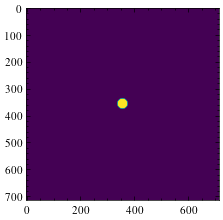

In [44]:
# Single pixel input
d = 715
mid = d//2

img = np.zeros((d,d)) # cv2.imread('input4.png', 0)/255. 


cv2.circle(img,(mid,mid), 19, (255.0), -1)
mid = img.shape[0]//2

plt.imshow(img)

In [45]:
img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
filters = np.zeros((3,3,1,1))
img = tf.cast(tf.repeat(tf.expand_dims([img], axis=-1) , repeats = filters.shape[-2], axis=-1), dtype=tf.float32)

In [47]:
f = tf.cast(np.array([[0,1,0], [0,0,0], [0,0,0]]), tf.float32)
fs, fa = getSymAntiSymTF(tf.reshape(f, (3,3,1,1)))
fs = (fs)/(tf.math.reduce_euclidean_norm(fs))
fa = (fa)/(tf.math.reduce_euclidean_norm(fa))


(fa*(.5)+fs*(0.5))[:,:, 0,0]

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0.        , 0.6830127 , 0.        ],
       [0.10566244, 0.        , 0.10566244],
       [0.        , 0.10566244, 0.        ]], dtype=float32)>

50 -50
39 39
42.605824
1.0000006
43.493263
43.917416
44.241543
44.516937
44.762344
44.986805
45.195602
45.39216
45.57875
45.757095
45.9284
46.093636
46.253586
46.408855
46.560005
46.70738
46.851406
46.992325
47.13048
47.266056
47.399246
47.530243
47.659187
47.786232
1.0000001
47.91149
48.035088
48.157135
48.277668
48.396793
48.514587
48.63115
48.746433
48.86058
48.973557
49.085506
49.196228
49.30614
49.414642
49.522636
49.62886
49.7351
49.83892
49.94346
50.044785
50.14772
50.246403
50.34779
50.44359
50.543606
50.63622
50.734947
50.82421
50.92176
51.00731
51.10381
51.18544
51.281033
51.358414
51.453197
51.52605
51.620255
51.688313
51.782055
51.845
51.938454
51.996113
52.08944
52.14182
52.234913
52.282394
52.37477
52.417297
52.509064
52.546604
52.637737
52.670254
52.76078
52.788273
52.87816
52.900635
52.989983
53.007477
53.09626
53.1088
53.19702
53.20465
53.292343
53.295135
53.382282
53.38025
53.466877
53.460194
53.54631
53.535004
53.62061
53.604774
53.689888
53.669617
53.75424
1.0
53.72

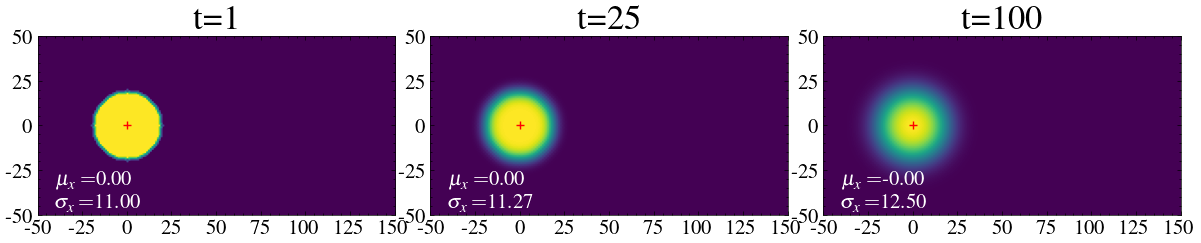

36.897724
1.0000002
37.578495
37.94222
38.21086
38.4361
38.635624
38.817493
38.986286
39.144924
39.295307
39.438843
39.576622
39.709366
39.837795
39.96237
40.083523
40.201553
40.316853
40.429615
40.54012
40.64845
40.75481
40.859367
40.962234
41.063572
0.99999994
41.163395
41.261833
41.359024
41.454945
41.549736
41.643375
41.736053
41.82759
41.91828
42.008007
42.096813
42.18476
42.271828
42.35817
42.44343
42.527985
42.612183
42.69479
42.776924
42.85906
42.93892
43.019043
43.098846
43.175808
43.25418
43.331417
43.405796
43.482136
43.55663
43.62865
43.702766
43.774136
43.84391
43.915913
43.983776
44.051437
44.121315
44.185184
44.250885
44.318695
44.37825
44.442146
44.507996
44.56388
44.624973
44.688957
44.742256
44.7992
44.86156
44.9124
44.964806
45.02569
45.074196
45.12169
45.181305
45.22761
45.269836
45.328423
45.372612
45.409233
45.467026
45.509335
45.540726
45.597275
45.63778
45.664223
45.719234
45.758057
45.77948
45.83302
45.870285
45.886658
45.938778
45.974598
45.985912
0.9999999
46

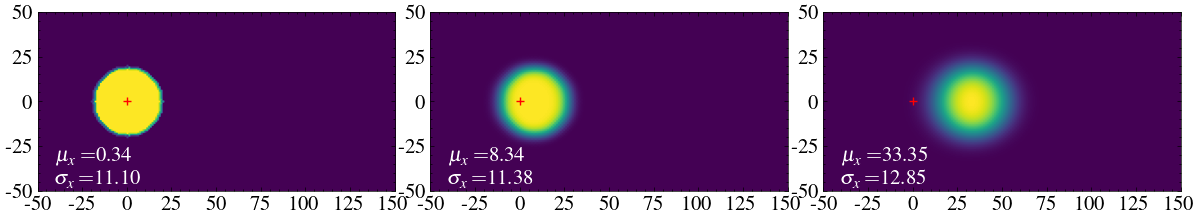

30.126865
0.99999994
30.540878
30.810717
31.011703
31.176203
31.31904
31.447565
31.565876
31.676403
31.78076
31.880014
31.97502
32.066364
32.154552
32.239914
32.32281
32.40345
32.4821
32.558918
32.63403
32.707638
32.779823
32.8507
32.92035
32.98887
1.0000001
33.056316
33.12277
33.188313
33.25294
33.31673
33.379734
33.442013
33.503555
33.564423
33.624664
33.684265
33.7433
33.80173
33.85962
33.916992
33.97387
34.030197
34.086166
34.141582
34.196472
34.251034
34.30512
34.358765
34.412148
34.46492
34.51716
34.569305
34.62069
34.672268
34.723145
34.773083
34.82334
34.872753
34.922283
34.971508
35.019367
35.06731
35.1149
35.1623
35.20997
35.25574
35.301186
35.34694
35.392212
35.438377
35.481987
35.524742
35.568615
35.61185
35.65649
35.697792
35.73778
35.779663
35.821037
35.86404
35.90285
35.940033
35.98034
36.019627
36.060837
36.096916
36.132126
36.170338
36.20744
36.246628
36.279697
36.31379
36.34943
36.384445
36.42132
36.451084
36.484745
36.51751
36.550556
36.584797
0.9999998
36.610928


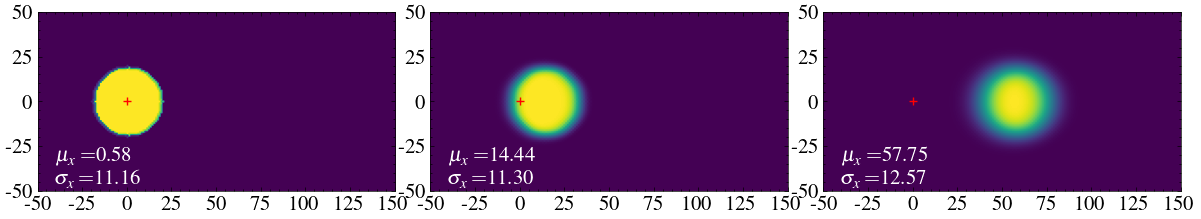

21.302912
1.0
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
1.0
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21.302927
21

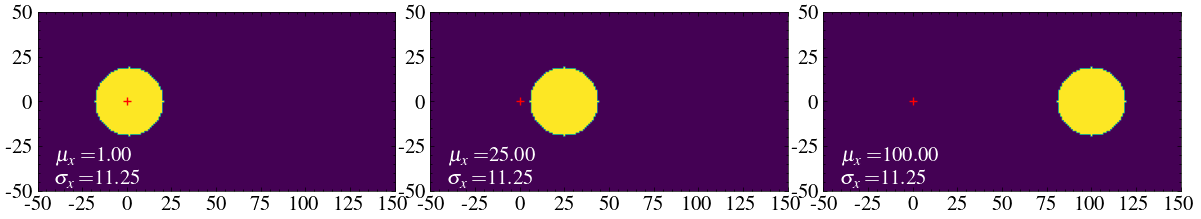

18.448864
1.0000004
96.581795
120.6453
134.25035
139.0703
141.433
142.46269
142.96672
143.26955
143.43161
143.51712
143.53923
143.53987
143.54016
143.54022
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
0.9999989
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
143.5402
0.9999989
143.5402


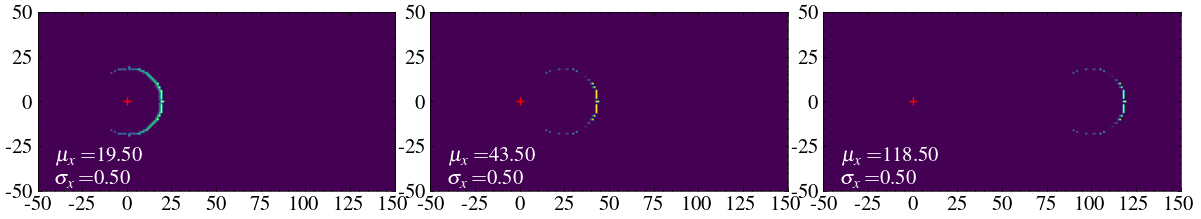

In [48]:
import matplotlib.patches as mpatches



filters = np.zeros((3,3,1,1))



#Get image height and width

vals_x = img[0, img.shape[1]//2, :, :]
vals_y = img[0, :, img.shape[2]//2, :]
nonzeros = np.nonzero(vals_x)[0]
if nonzeros.size > 0:
    length_y = nonzeros[-1] - nonzeros[0] + 1
else:
    length_y = 0  # all zeros
nonzeros = np.nonzero(vals_x)[0]
if nonzeros.size > 0:
    length_x = nonzeros[-1] - nonzeros[0] + 1
else:
    length_x = 0  # all zeros



#step = 2**np.floor(np.log2(( (length_x) + np.max(timestamps) )// 5))


max_x = int(box_dims[0]*(.75))
min_x = -int(box_dims[0]*(.25))

max_y = box_dims[1]//2
min_y = -(box_dims[1]//2)

print(max_y, min_y)
print(length_x, length_y)


for activation in activations:

	directory = f"figures/{experiment_name}_{activation.__name__}_{k}x{k}"
	if not os.path.exists(directory):
		os.makedirs(directory)




	for beta2 in beta2s:

		
		images = []

		filters = np.zeros((3,3,1,1))

		t = np.zeros((3,3))
		t[1, 0] = np.sqrt(beta2)
		t[0, 0] = np.sqrt(1-beta2)
		filters = fa*( np.sqrt(beta2)) + fs*( np.sqrt(1-beta2))
		#filters /= np.sum(np.abs(filters))
		
		w =tf.cast(filters, dtype=tf.float32)# tf.expand_dims(filters, -1), dtype=tf.float32)
		w = tf.transpose(w, perm=(1,0,2,3))



		x = img


		#Generate Plot
		fig = plt.figure(figsize=(16,len(timestamps)+1))
		gs = fig.add_gridspec(1,len(timestamps)+1, wspace=0.1)

		'''ax0 = fig.add_subplot(gs[0], projection='3d')
		plot_filter_x(beta2, ax = ax0)
		ax0.axis('off')'''

		#for i, im in enumerate(images):	
		plot_num = 1
		for i in range(timestamps[-1]+1):
			x = x/np.std(x)
			
			if i in timestamps:

				ax = fig.add_subplot(gs[plot_num])
				plot_num+=1
				print(np.std(x))
				vals = x[0, x.shape[1]//2, :, :]
				vals = vals/np.sum(vals)

				pos = np.expand_dims(np.linspace(-(x.shape[1]//2), x.shape[1]//2, x.shape[1]),-1)
				mean = tf.reduce_sum(pos*vals)
				var = tf.reduce_sum(((pos-mean)**2) * vals)
				std = np.sqrt(var)
				#print(mean, np.sqrt(var))
				
				im = ax.imshow(x[0,:,:,0])
				ax.plot(mid, mid, marker = '+', color='red')

				'''arr =  mpatches.FancyArrowPatch((mid, mid), (mid+mean+std, mid),
										mutation_scale=4, shrinkA=0, shrinkB=0,zorder=10, color="red")
				ax.add_patch(arr)'''


				ax.annotate(r'$\sigma_x=$'+f"{std:.2f}", (0.05,0.01), ha='left', va='bottom',color='white', xycoords='axes fraction', fontsize=15)
				ax.annotate(r'$\mu_x=$'+f"{mean:.2f}", (0.05,0.14), ha='left', va='bottom',color='white', xycoords='axes fraction', fontsize=15)
				#ax.annotate(r'$argmax_x=$'+f"{np.argmax(vals)-mid:.2f}", (0.05,.17), ha='left', va='bottom',color='white', xycoords='axes fraction')
				
				#ax.annotate(r'$\sigma=$'+f"{std:.2f}", (.5, 6), xycoords=arr, ha='center', va='bottom',color='white')
				#ax.arrow(, 112, dx=, dy= 0, color='black')




				ax.set(xlim=((mid + min_x, mid+max_x)) , ylim=((mid+min_y, (mid+max_y))))

				# Re-label ticks relative to midpoint
				xticks = ax.get_xticks()
				yticks = ax.get_yticks()

				#ax.set_xticklabels(np.arange(min_x, max_x+1, step=2))
				#ax.set_yticklabels(np.arange(min_y, max_y+1, step=2))
				xticks = np.arange(np.sign(min_x) * (np.abs(min_x)//2)*2, step+(max_x//2)*2, step=step) + mid
				yticks = np.arange(np.sign(min_y) * (np.abs(min_y)//2)*2, step+(max_y//2)*2, step=step) + mid
				ax.set_xticks(xticks)
				ax.set_yticks(yticks)
				ax.tick_params(axis='x', labelsize=15)
				ax.tick_params(axis='y', labelsize=15)


				ax.set_xticklabels([x - mid for x in xticks])
				ax.set_yticklabels([y - mid for y in yticks])



				#ax.set_xticks(np.linspace(-round(std)-1, round(std)+1, int(0.5*(std)+3)))
				#fig.colorbar(im, orientation='vertical')

				'''plt.close(fig) 
				buf = BytesIO()
				fig.savefig(buf, format="svg", dpi=fig.dpi, bbox_inches="tight")
				buf.seek(0)'''



				#ax0.imshow(im)
				#ax.axis('off')
				if beta2 == 0:
					ax.set_title(f"t={i}", fontsize=25)

				#images.append(Image.open(buf))
				#print(x)

			x = activation( tf.nn.conv2d(x, w , strides=(1,1), 
									padding='SAME') )
			print(np.max(x))


		fig.subplots_adjust(left=0.02, right=0.98, top=0.9, bottom=0.01, wspace=0.1)
		fig.savefig(os.path.join(directory, f"{experiment_name}_{k}x{k}__{activation.__name__}_{beta2}.pdf"), format="pdf", dpi=fig.dpi, bbox_inches="tight")
		plt.show()


In [49]:
xticks-mid

array([-50, -25,   0,  25,  50,  75, 100, 125, 150])

In [50]:
mid

357

In [51]:
yticks#-mid

array([307, 332, 357, 382, 407])

In [52]:
step

25